In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
!pwd

/content


In [4]:
%cd ./drive/MyDrive/

/content/drive/MyDrive


In [13]:
!ls

best.pt  colab_requirements.txt  flask.ipynb  README.md  server.ipynb  yolov5


In [12]:
%cd ./test

/content/drive/MyDrive/test


In [14]:
%pip install -r colab_requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00


In [20]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path= './best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 8.5s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-23 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
%cd ./test

/content/drive/MyDrive/test


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-23 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 1076x1010 1 Top, 1 Bottom
Speed: 13.6ms pre-process, 362.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 608)


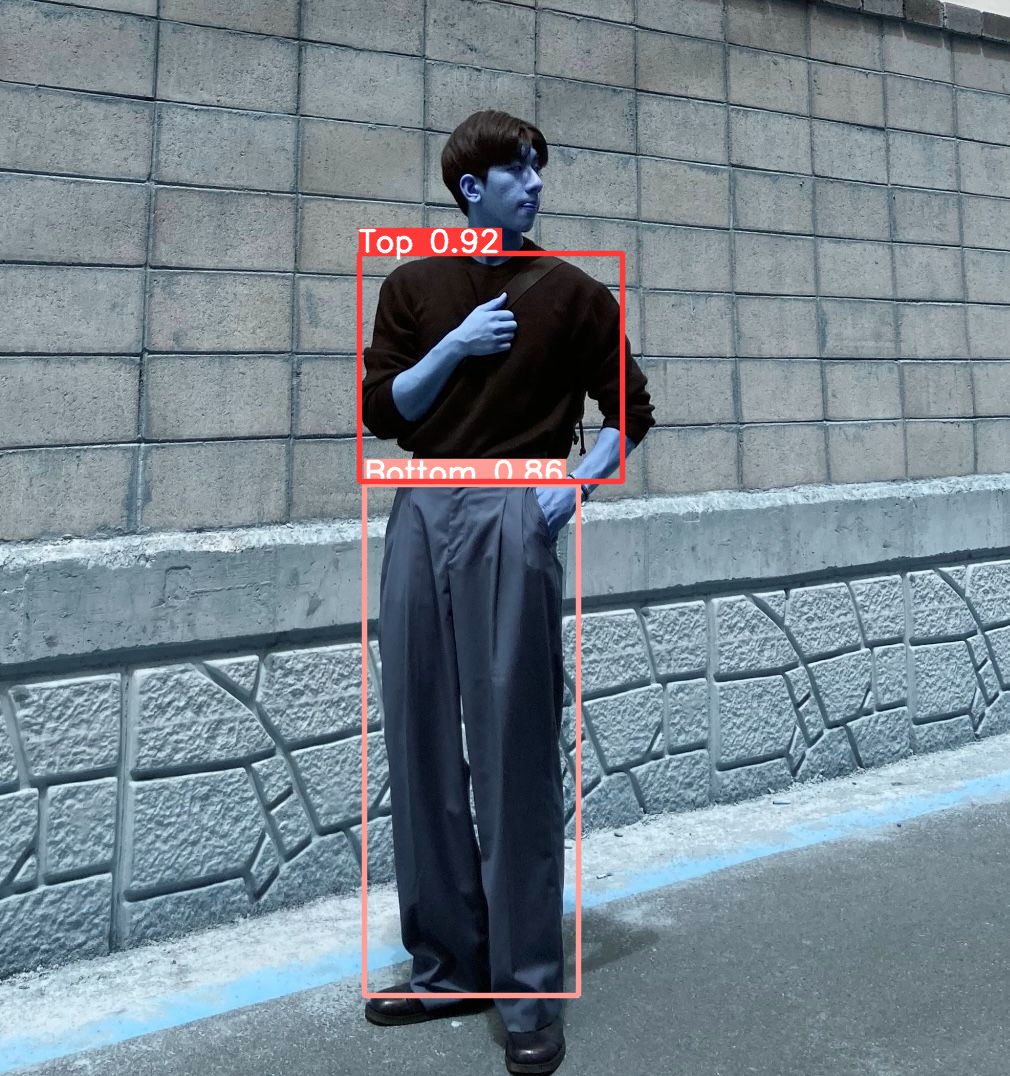

In [10]:
import cv2
import torch
import numpy as np

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

# 이미지 로드
img = cv2.imread('t.png')

# 모델 추론
results = model(img)

# 결과 시각화
results.print()  # 감지된 객체와 confidence scores 출력
results.show()   # 이미지에 바운딩 박스와 클래스 라벨 표시

# 모델 저장
torch.save(model.state_dict(), 'custom_model.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-23 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 500x400 1 Top, 1 Bottom
Speed: 5.0ms pre-process, 450.4ms inference, 1.3ms NMS per image at shape (1, 3, 640, 512)


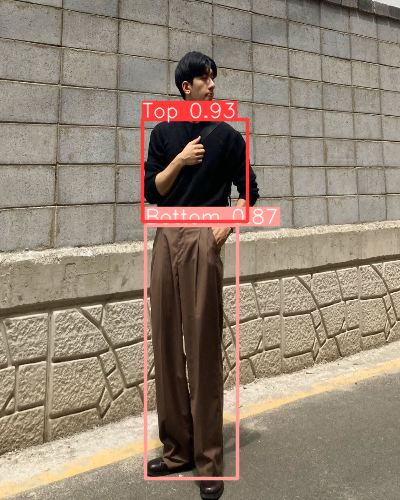

Extracted Colors:
        TOP_RGB    BOTTOM_RGB
0  (49, 43, 41)  (89, 72, 57)


In [30]:
import cv2
import torch
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from PIL import Image

def extract_colors_from_bboxes(resized_image, bboxes):
    result_df = pd.DataFrame(columns=['TOP_RGB', 'BOTTOM_RGB'])

    for idx, bbox in enumerate(bboxes):
        class_label = idx  # 예제에서는 클래스 레이블을 간단하게 인덱스로 사용합니다.

        # 주요 색상 추출
        cropped_image = resized_image.crop((bbox[0], bbox[1], bbox[2], bbox[3]))

        major_color = kmeans_find_major_color(cropped_image)

        # 주요 색상과 클래스 레이블을 DataFrame에 추가
        if major_color is not None:
            if class_label == 0:
                result_df.loc[0, 'TOP_RGB'] = major_color
            elif class_label == 1:
                result_df.loc[0, 'BOTTOM_RGB'] = major_color
        else:
            # 주요 색상이 없는 경우 출력하지 않음
            continue

    return result_df

def convert_to_original(data):
    return tuple(np.array(data) * 255.0)

def convert_to_numeric(data):
    # RGB 값들을 0에서 1 사이의 실수 값으로 정규화
    return np.array([np.array(rgb) / 255.0 for rgb in data])

def kmeans_find_major_color(image):
    pixels = np.array(image)[:, :, :3].reshape((-1, 3))
    kmeans = KMeans(n_clusters=1, n_init=10, random_state=42)
    kmeans.fit(pixels)

    if kmeans.cluster_centers_ is not None and len(kmeans.cluster_centers_) > 0:
        dominant_color = tuple(map(int, kmeans.cluster_centers_[0]))
        return dominant_color
    else:
        return None

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

# 이미지 로드
img = cv2.imread('testImg/t.png')
resize=(400, 500)

# 원하는 크기로 이미지 리사이징
resized_image = cv2.resize(img, resize)

# NumPy 배열을 PIL 이미지로 변환
resized_image_pil = Image.fromarray(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

# 객체 검출 수행
results_resized = model(resized_image_pil)

# 바운딩 박스 좌표 추출
bboxes = [detection[0:4].cpu().numpy().astype(int) for detection in results_resized.xyxy[0]]

# 바운딩 박스 좌표와 주요 색상 추출
result_df = extract_colors_from_bboxes(resized_image_pil, bboxes)

# 결과 시각화
results_resized.print()  # 감지된 객체와 confidence scores 출력
results_resized.show()   # 이미지에 바운딩 박스와 클래스 라벨 표시

# 추출된 주요 색상 출력
print("Extracted Colors:")
print(result_df)
